<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-29/La2_3_c_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [14]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1564, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 1564 (delta 103), reused 17 (delta 17), pack-reused 1411
Receiving objects: 100% (1564/1564), 106.56 MiB | 20.52 MiB/s, done.
Resolving deltas: 100% (925/925), done.
Updating files: 100% (197/197), done.


'/content/gator/data/07-29'

### 24-07-25 La2/3-c gating

Gate voltage parameters :
- Amp : 4Vpp
- Offset : 500 mV
- Duty Cycle : 1%
- Power supply: 2V
Trying to tap off the gating electrode



In [15]:
%cd "/content/gator/data/07-29/"

/content/gator/data/07-29


In [16]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [17]:
prep_csv('defbuffer1_0729_151726.csv')
df = pd.read_csv('defbuffer1_0729_151726.csv')


Fill Mode,1



In [18]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.024022,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999935,Volt DC,1,T,2W,F,F,0.000000
1,0.023974,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999935,Volt DC,1,T,2W,F,F,0.069385
2,0.023956,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999935,Volt DC,1,T,2W,F,F,0.138719
3,0.023947,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999934,Volt DC,1,T,2W,F,F,0.208058
4,0.023941,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999935,Volt DC,1,T,2W,F,F,0.277400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,0.028027,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999934,Volt DC,1,T,2W,F,F,181.760214
2622,0.021893,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999935,Volt DC,1,T,2W,F,F,181.829563
2623,0.022026,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999935,Volt DC,1,T,2W,F,F,181.898913
2624,0.021922,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999934,Volt DC,1,T,2W,F,F,181.968251


In [19]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e12

# Potential (mV)
V = df['Value'] * 1e3

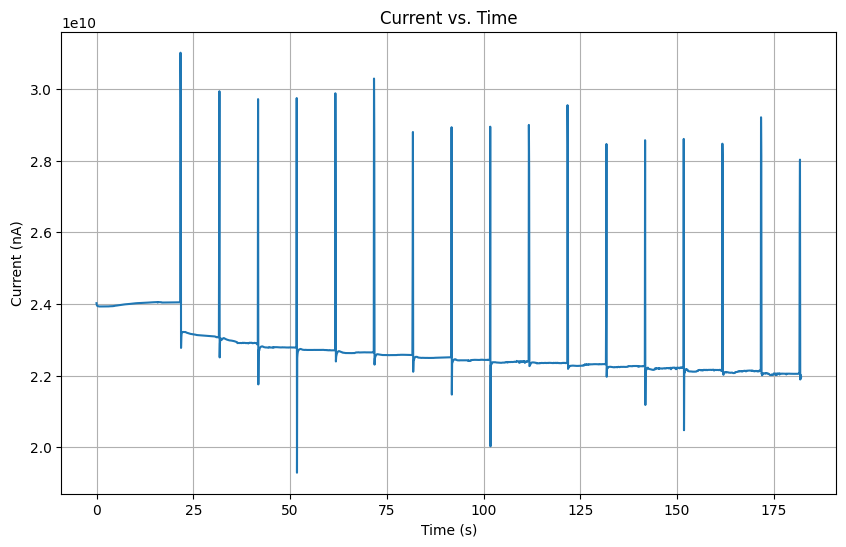

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(T, I)

plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.title('Current vs. Time')

plt.grid(True)
plt.show()


In [21]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e12
df_new.loc[:, 'Value'] = df_new['Value'] * 100
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


<ipython-input-21-05c1968da0ac>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()


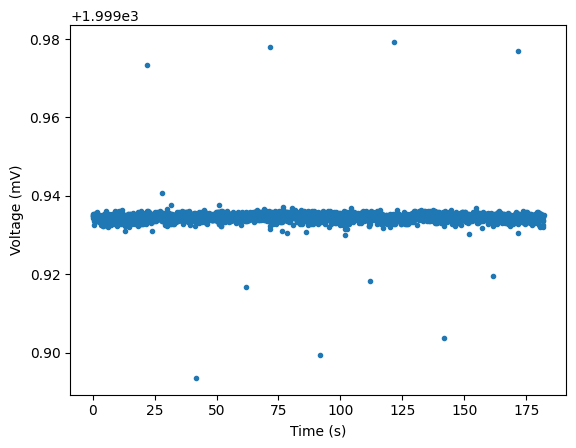

In [23]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

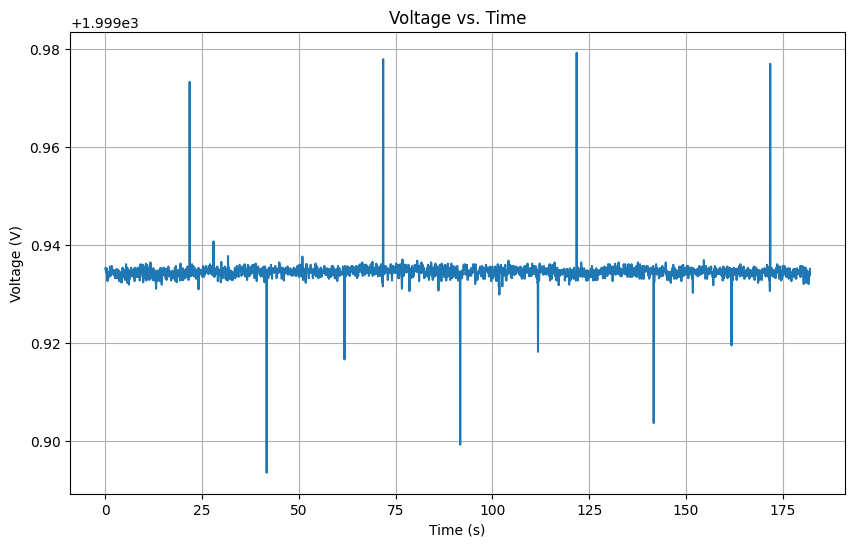

In [24]:
plt.figure(figsize=(10, 6))

plt.plot(T, V)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

plt.title('Voltage vs. Time')

plt.grid(True)
plt.show()